# Predicting Quality of Red Wine

The red wine quality dataset showcases several physical properties of wines that people have reviewed on a scale of 1-10. 

The following are the features of the dataset:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

The goal is to predict whether a wine will be reviewed as good or bad based on these features.

In order to make the predictions, different classification algorithems will be optimized and tested to learn if we can accurately predict wine quality with this data.

## Read in our Data

Import the libraries we'll need for the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from pandas_profiling import ProfileReport

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

Read in the dataset and observe general characteristics.

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All features are floats except for our goal feature 'quality' that is an integer. This will make engineering 'quality' into a binary classification of good or bad easy. 

There are also no nulls in the data, so missing data won't need to be addressed during data cleaning. 

## Exploratory Data Analysis

#### Goal Feature: Quality

<AxesSubplot:xlabel='quality', ylabel='count'>

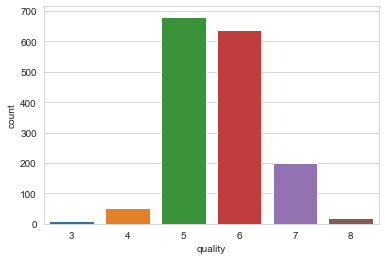

In [4]:
sns.countplot(x='quality',data=df)

In [5]:
perc_3 = round((df[df['quality'] == 3]['quality'].count()/(df['quality'].count()))*100,2)
perc_4 = round((df[df['quality'] == 4]['quality'].count()/(df['quality'].count()))*100,2)
perc_5 = round((df[df['quality'] == 5]['quality'].count()/(df['quality'].count()))*100,2)
perc_6 = round((df[df['quality'] == 6]['quality'].count()/(df['quality'].count()))*100,2)
perc_7 = round((df[df['quality'] == 7]['quality'].count()/(df['quality'].count()))*100,2)
perc_8 = round((df[df['quality'] == 8]['quality'].count()/(df['quality'].count()))*100,2)

qual_perc_lst = [perc_3,perc_4,perc_5,perc_6,perc_7,perc_8]

In [6]:
qual_perc = pd.DataFrame(columns=[3,4,5,6,7,8],data=[qual_perc_lst])

Percent of each quality score:

In [7]:
qual_perc

,3,4,5,6,7,8
0,0.63,3.31,42.59,39.9,12.45,1.13


As shown above, most reviews rated the wine as either a 5 or 6. Less than 2% are rated as 3 or 8.

To split the data between good and bad wine, we will draw the line at 5.5. This indicates that wine reviewed lower than 5.5 will be denoted as '0' and higher than 5.5 as '1'. 

In [8]:
df['quality'] = pd.cut(df['quality'],bins=(2,5.5,8),labels=[0,1])

Countplot of quality after splitting into '0' and '1':

### Other Features

We'll inspect each feature's distribution and correlation with our goal.

#### Fixed Acidity

<AxesSubplot:xlabel='fixed acidity', ylabel='Count'>

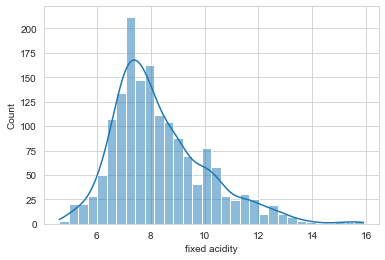

In [9]:
sns.histplot(df['fixed acidity'],kde=True)

Figure(432x288)


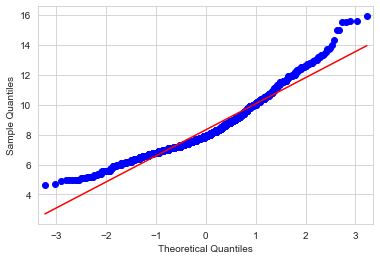

In [10]:
fig = sm.qqplot(df['fixed acidity'],line='s')
print(fig)

#### Volatile Acidity

<AxesSubplot:xlabel='volatile acidity', ylabel='Count'>

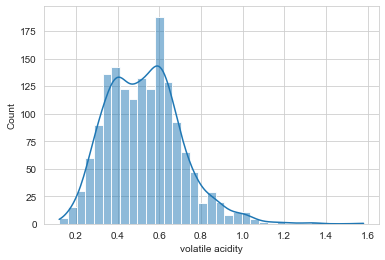

In [11]:

sns.histplot(df['volatile acidity'],kde=True)

Figure(432x288)


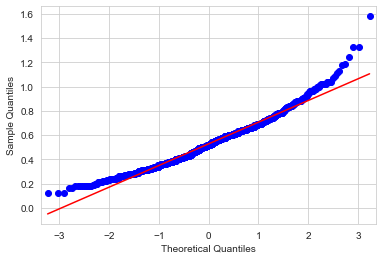

In [12]:
fig = sm.qqplot(df['volatile acidity'],line='s')
print(fig)

#### Citric Acid

<AxesSubplot:xlabel='citric acid', ylabel='Count'>

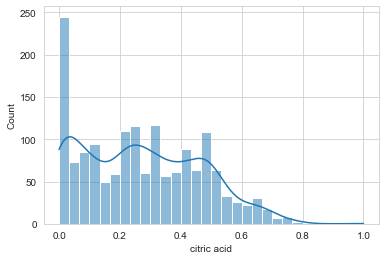

In [13]:
sns.histplot(df['citric acid'],bins=30,kde=True)

Figure(432x288)


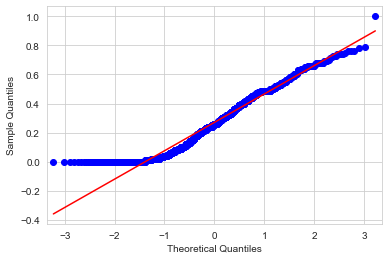

In [14]:
fig = sm.qqplot(df['citric acid'],line='s')
print(fig)

In [15]:
df[df['citric acid'] == 0]['citric acid'].count()

132

In [16]:
round(df[(df['citric acid'] == 0) & (df['quality'] == 1)]['quality'].count()/(df[df['citric acid'] == 0]['citric acid'].count()),2)

0.47

There are a large amount of wines with 0 citric acid that has skewed the data left.

132 wines have a citric acid level of 0, and interestingly, 47% of those have a **good** quality. No strong correlation.

#### Residual Sugar

<AxesSubplot:xlabel='residual sugar', ylabel='Count'>

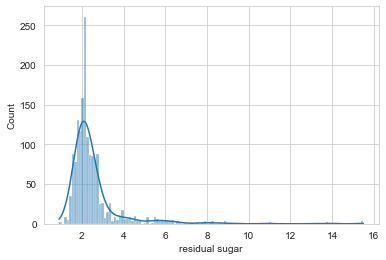

In [17]:
sns.histplot(df['residual sugar'],kde=True)

Figure(432x288)


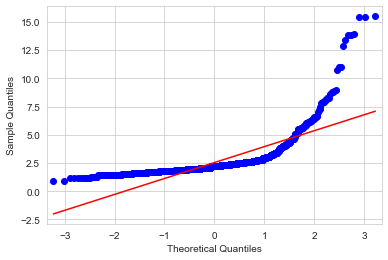

In [18]:
fig = sm.qqplot(df['residual sugar'],line='s')
print(fig)

#### Chlorides

<AxesSubplot:xlabel='chlorides', ylabel='Count'>

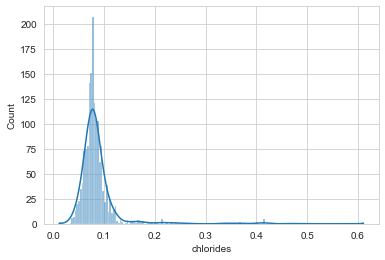

In [19]:
sns.histplot(df['chlorides'],kde=True)

Figure(432x288)


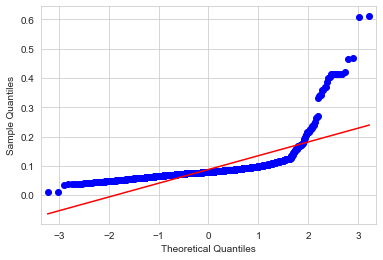

In [20]:
fig = sm.qqplot(df['chlorides'],line='s')
print(fig)

#### Free Sulfur Dioxide

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

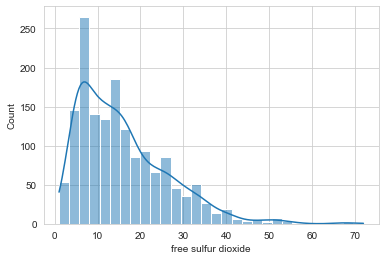

In [21]:
sns.histplot(df['free sulfur dioxide'],kde=True)

Figure(432x288)


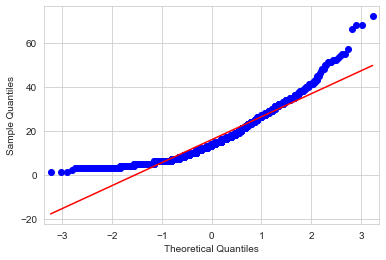

In [22]:
fig = sm.qqplot(df['free sulfur dioxide'],line='s')
print(fig)

#### Total Sulfur Dioxide

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Count'>

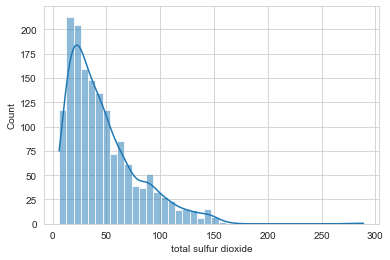

In [23]:
sns.histplot(df['total sulfur dioxide'],kde=True)

Figure(432x288)


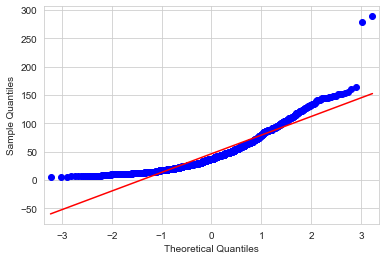

In [24]:
fig = sm.qqplot(df['total sulfur dioxide'],line='s')
print(fig)

#### Density

<AxesSubplot:xlabel='density', ylabel='Count'>

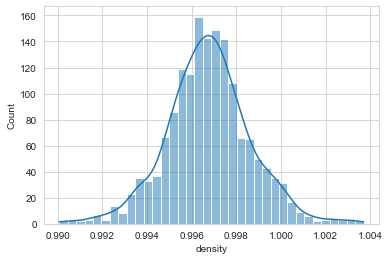

In [25]:
sns.histplot(df['density'],kde=True)

Figure(432x288)


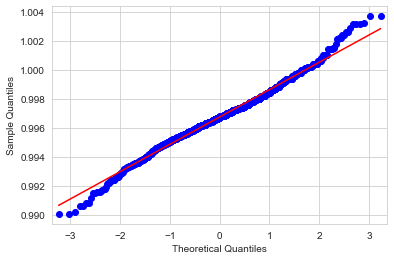

In [26]:
fig = sm.qqplot(df['density'],line='s')
print(fig)

#### pH

<AxesSubplot:xlabel='pH', ylabel='Count'>

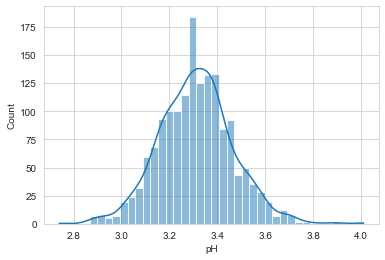

In [27]:
sns.histplot(df['pH'],kde=True)

Figure(432x288)


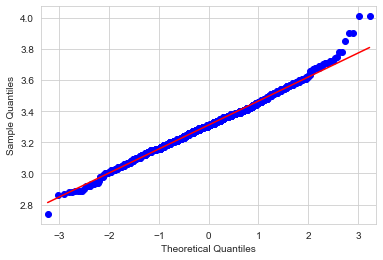

In [28]:
fig = sm.qqplot(df['pH'],line='s')
print(fig)

#### Sulphates

<AxesSubplot:xlabel='sulphates', ylabel='Count'>

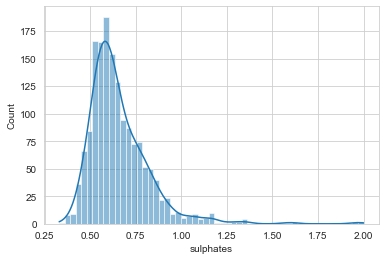

In [29]:
sns.histplot(df['sulphates'],kde=True)

Figure(432x288)


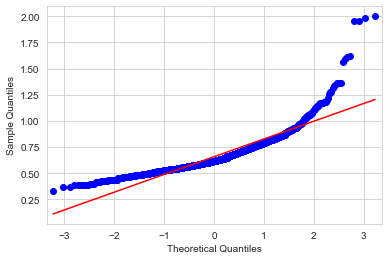

In [30]:
fig = sm.qqplot(df['sulphates'],line='s')
print(fig)

#### Alcohol

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

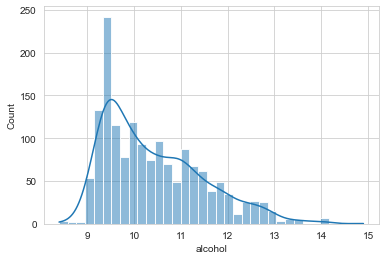

In [31]:
sns.histplot(df['alcohol'],bins=35,kde=True)

Figure(432x288)


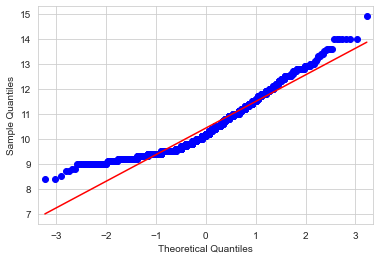

In [32]:
fig = sm.qqplot(df['alcohol'],line='s')
print(fig)

#### Correlations

<AxesSubplot:>

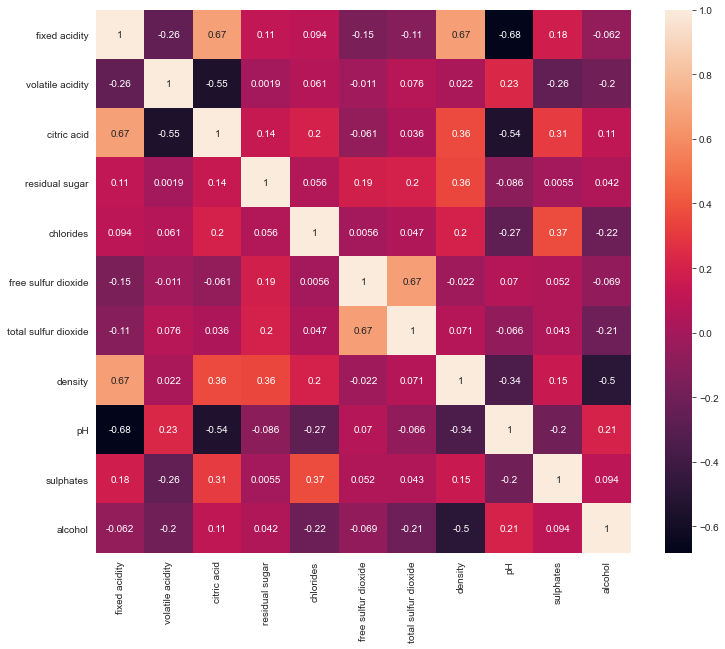

In [33]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df.corr(),annot=True)

#### In Summary:

- Many features are skewed heavily right. The data will need to be transformed during cleaning to for predictive models that require normal distribution
- There also appear to be outliers for many of the features. We'll use the innerquartile range to eliminate these values for all features
- Many features appear to be colinear with each other and will need to be removed. Also, we'll remove features that do not correlate highly with quality

## Data Cleaning

#### Duplicates

In [34]:
dup_check = len(df.duplicated())
dups = sum(df.duplicated())
round(dups/dup_check,2)

0.15

We've found 15% duplicates in the dataset, but we will leave them in the data. They are most likely occuring when the same wine is being rated by multiple people. 

#### Outliers

We will use innerquartile range as a method of outlier detection and removal from all features.

In [35]:
# shape of data before outlier removal

df.shape

(1599, 12)

In [36]:
for column in df.columns.drop('quality'):
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1
    
    df = df[(df[column] > (Q1 - 1.5 * IQR)) & (df[column] < (Q3 + 1.5 * IQR))]

In [37]:
# shape of data after outliers removed

df.shape

(1135, 12)

464 rows of data were outside the innerquartile range of their feature and were removed.

#### Transform

To standardize data, 

In [38]:
X = df.drop('quality',axis=1)
y = df['quality']

In [39]:
scaler = StandardScaler()

scaler.fit(X)
X_t = scaler.transform(X)

In [40]:
# make a new dataframe for transformed data

cols = df.columns.drop('quality')

col_lst = []

for i in cols:
    col_lst.append(i)
    
df_t = pd.DataFrame(columns=col_lst,data=X_t)

#### Remove Features

Any features that exhibit colinearity with another features (other than quality) higher than 0.6 will be removed.

In [49]:
df_t = df_t.drop(['citric acid','fixed acidity','free sulfur dioxide'],axis=1)

## Predict Wine Rating

We'll build a few different models to see which can be most successful at predicting our goal feature.

### Train/Test Split

In [51]:
X = df_t

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Decision Tree

First, we'll fit a standard decision tree classifier from sklearn to the data, and then see if we can optimize it.

In [52]:
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train,y_train)
preds = dtree_model.predict(X_test)

print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.62      0.79      0.70        86
           1       0.85      0.71      0.77       141

    accuracy                           0.74       227
   macro avg       0.74      0.75      0.73       227
weighted avg       0.76      0.74      0.74       227

[[ 68  18]
 [ 41 100]]


### Random Forest

Next, we'll use a Random Forest model to predict wine quality rating. Again, we'll first use the unoptimized model from sklearn before using the randomized search to try and improve. The parameters we will optimize are max depth and number of estimators. 

In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
predictions = rf_model.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.67      0.84      0.74        86
           1       0.88      0.74      0.81       141

    accuracy                           0.78       227
   macro avg       0.77      0.79      0.77       227
weighted avg       0.80      0.78      0.78       227

[[ 72  14]
 [ 36 105]]


In [54]:
rf_model = RandomForestClassifier()
dists = {'max_depth':range(1,33),'n_estimators':range(50,1000,50)}

random = RandomizedSearchCV(rf_model, dists, random_state=42)
rf_random = random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 700, 'max_depth': 10}

In [55]:
best_rf = rf_random.best_estimator_
preds = best_rf.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        86
           1       0.90      0.74      0.81       141

    accuracy                           0.78       227
   macro avg       0.78      0.80      0.78       227
weighted avg       0.81      0.78      0.79       227

[[ 74  12]
 [ 37 104]]


### Gradient Boost

In [56]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train,y_train)
preds = gb.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.63      0.84      0.72        86
           1       0.88      0.70      0.78       141

    accuracy                           0.75       227
   macro avg       0.75      0.77      0.75       227
weighted avg       0.78      0.75      0.76       227

[[72 14]
 [42 99]]


Let's again use the Random Search to tune the parameters of the GB classifier.

In [57]:
gb_model = GradientBoostingClassifier()
dists = {'learning_rate':[.1,.2,.3,.4,.5,.6],'n_estimators':range(50,1000,50),'loss':['deviance','exponential']}

random = RandomizedSearchCV(gb_model, dists, random_state=42)
gb_random = random.fit(X_train,y_train)
gb_random.best_params_

{'n_estimators': 550, 'loss': 'deviance', 'learning_rate': 0.6}

In [58]:
best_gb = gb_random.best_estimator_
preds = best_gb.predict(X_test)
print(classification_report(y_test,preds))
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.64      0.80      0.72        86
           1       0.86      0.73      0.79       141

    accuracy                           0.76       227
   macro avg       0.75      0.77      0.75       227
weighted avg       0.78      0.76      0.76       227

[[ 69  17]
 [ 38 103]]


Using the random search, this model performed very similarly to the random forest model. GB Model slightly better for predicting good wine, and the Random Forest Model slightly better for predicting bad wine.